In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging

In [9]:
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
url = "https://drive.google.com/file/d/1wZJfhjg5c6VaeIxHHDvuzG7C4OZPY2bb/view?usp=sharing"
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
copy_df = df
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.shape


(8523, 12)

## Filling Null Values

In [10]:
# There are significant missing values in Item_weigth column
df["Item_Weight"].isna().sum()

1463

<AxesSubplot: xlabel='Item_Weight', ylabel='Count'>

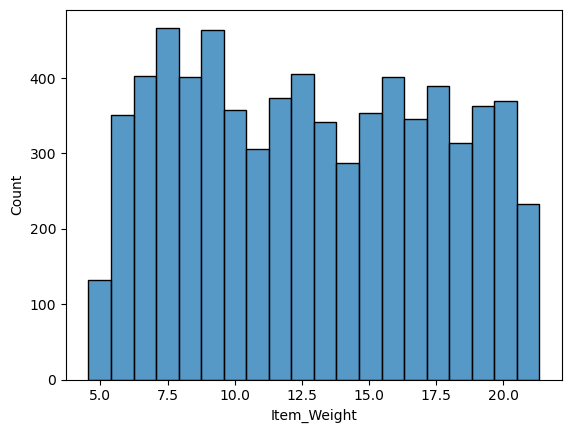

In [11]:
#Cheaking the distribution of the Item_weight
sns.histplot(df["Item_Weight"])

In [12]:
##Observation : The data is uniformly distributed , so we use Uniform imputing
#For unifrom enoding we need unifrom data as per our dataset

df.loc[df["Item_Weight"].isna(),"Item_Weight"] = np.random.uniform(df["Item_Weight"].min(),df["Item_Weight"].max(),df["Item_Weight"].isna().sum())

In [13]:
df["Item_Weight"].isnull().sum()

0

<AxesSubplot: xlabel='Item_Weight', ylabel='Count'>

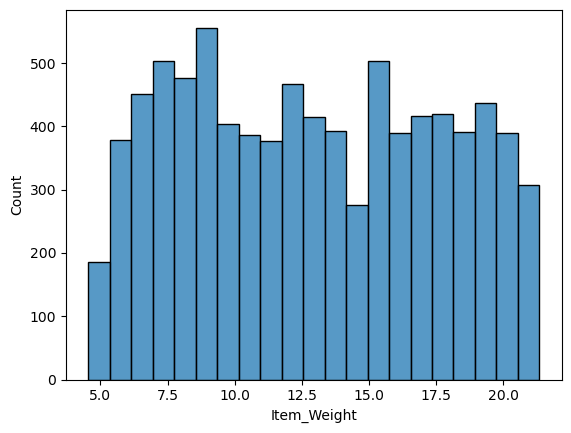

In [14]:
# as we see there are no null values now ,
sns.histplot(df["Item_Weight"])

In [15]:
## The distrbution of thItem_Weight column is similiar i.e., Uniformly distributed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
#Now for Outlet_Size
df["Outlet_Size"].isna().sum()

2410

In [17]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

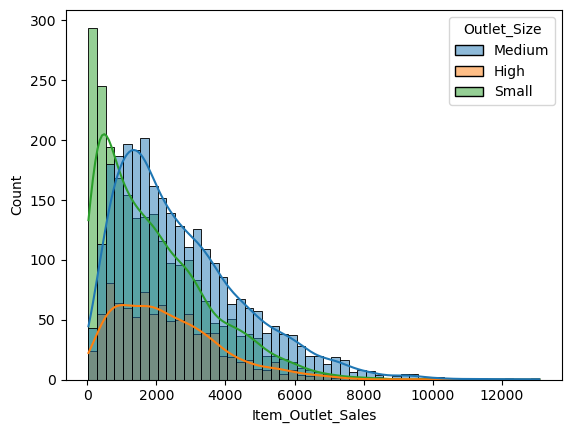

In [19]:
sns.histplot(data = df,x = 'Item_Outlet_Sales',kde = True, hue ='Outlet_Size')

In [20]:
## Filling the outlet size missing values based on the mean values
for i in range(len(df["Outlet_Size"])):
    if df["Outlet_Size"].isna()[i]:
        if df["Item_Outlet_Sales"][i] < 1912:
            df["Outlet_Size"][i] = "Small"
        elif df["Item_Outlet_Sales"][i] < 2681:
            df["Outlet_Size"][i] = "Medium"
        else:
            df["Outlet_Size"][i] = "High"

/tmp/ipykernel_195/821797287.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size"][i] = "Small"
/tmp/ipykernel_195/821797287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size"][i] = "High"
/tmp/ipykernel_195/821797287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size"][i] = "Medium"


In [21]:
df["Outlet_Size"].isna().sum()

0

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

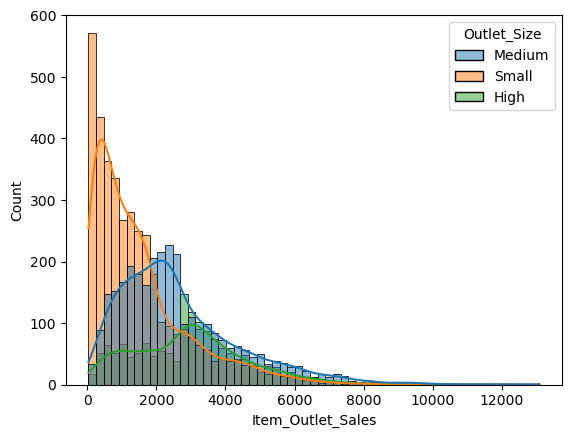

In [22]:
sns.histplot(data = df,x = 'Item_Outlet_Sales',kde = True, hue ='Outlet_Size')

In [23]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
## ALl the null values are now filled , 
df.duplicated().sum()

0

## Data Encoding 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [27]:
#exploring Item_Fat_Content
df["Item_Fat_Content"].unique(),df["Item_Fat_Content"].value_counts()

(array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object),
 Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64)

In [28]:
# Fixing the item_Fat_Content column as it contain different Label to indicate same information
labels = df["Item_Fat_Content"].unique()
Low_Labels = ['Low Fat', 'low fat', 'LF']
Reg_Lables = ['Regular', 'reg']
for i in labels:
    if i in Low_Labels:
        df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace(i,"L")
    elif i in Reg_Lables:
        df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace(i,"R")
        
df["Item_Fat_Content"].unique()    

array(['L', 'R'], dtype=object)

In [29]:
df["Item_Fat_Content"]

0       L
1       R
2       L
3       R
4       L
       ..
8518    L
8519    R
8520    L
8521    R
8522    L
Name: Item_Fat_Content, Length: 8523, dtype: object

In [30]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].map({"L":0,"R":1})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


In [32]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [33]:
df["Item_Type"].nunique(),df["Item_Type"].value_counts()

(16,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["Item_Type"])

LabelEncoder()

In [35]:
df["Item_Type"] = le.transform(df["Item_Type"])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 799.2+ KB


In [37]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [38]:
df["Outlet_Identifier"].unique(),df["Outlet_Identifier"].value_counts()

(array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
        'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object),
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64)

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

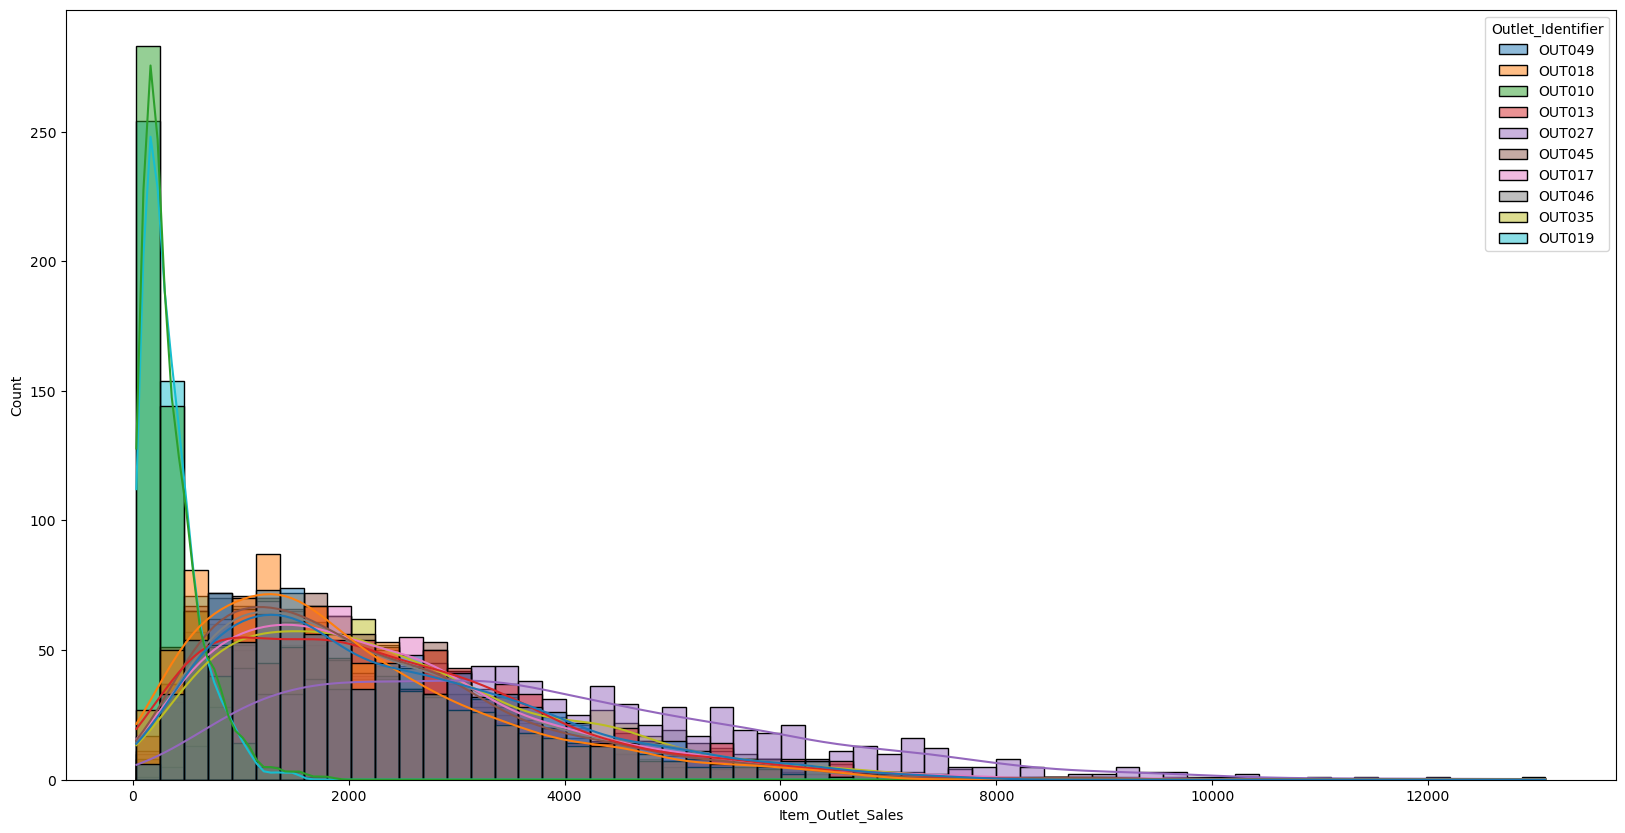

In [39]:
plt.figure(figsize=(20,10))
sns.histplot(data = df,x = 'Item_Outlet_Sales',kde = True, hue ='Outlet_Identifier')

In [40]:
df["Outlet_Identifier"] = le.fit_transform(df["Outlet_Identifier"])

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

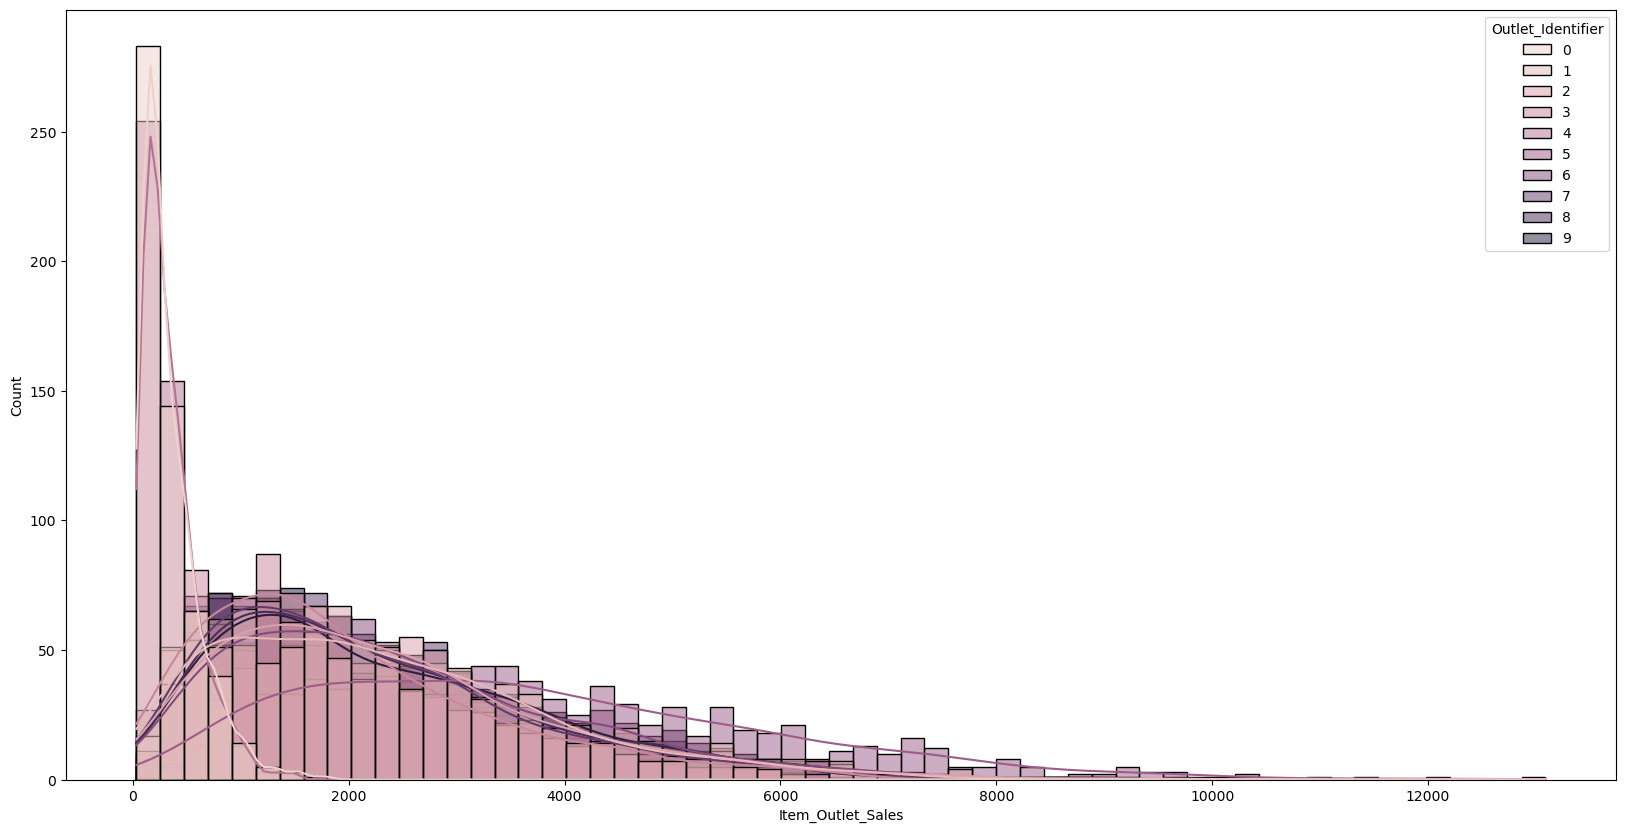

In [41]:
plt.figure(figsize=(20,10))
sns.histplot(data = df,x = 'Item_Outlet_Sales',kde = True, hue ='Outlet_Identifier')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 799.2+ KB


In [43]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [44]:
df["Outlet_Size"].nunique(),df["Outlet_Size"].value_counts()

(3,
 Small     3856
 Medium    3132
 High      1535
 Name: Outlet_Size, dtype: int64)

In [45]:
for i in df["Outlet_Size"].unique():
    print(i)
    print(df[df["Outlet_Size"]== i]["Item_Outlet_Sales"].mean())

Medium
2638.92848633461
Small
1494.2839824170123
High
2973.3174951140068


In [46]:
## Encoding Outlet Size columns
df["Outlet_Size"] = df["Outlet_Size"].map({"Small" : 0,"Medium" : 1, "High" : 2})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 799.2+ KB


In [48]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,Tier 1,Supermarket Type1,2097.2700


In [49]:
df["Outlet_Location_Type"].nunique(),df["Outlet_Location_Type"].value_counts()

(3,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type, dtype: int64)

In [50]:
for i in df["Outlet_Location_Type"].unique():
    print(i)
    print(df[df["Outlet_Location_Type"]== i]["Item_Outlet_Sales"].mean())

Tier 1
1876.9091591289784
Tier 3
2279.6276513432836
Tier 2
2323.990558850988


In [51]:
## Encoding Outlet Size columns
df["Outlet_Location_Type"] = df["Outlet_Location_Type"].str.replace(" ","").map({"Tier1" : 0,"Tier2" : 2, "Tier3":1})

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 799.2+ KB


In [53]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,1,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,Supermarket Type1,2097.2700


In [54]:
df["Outlet_Type"].nunique(), df["Outlet_Type"].value_counts()

(4,
 Supermarket Type1    5577
 Grocery Store        1083
 Supermarket Type3     935
 Supermarket Type2     928
 Name: Outlet_Type, dtype: int64)

In [55]:
for i in df["Outlet_Type"].unique():
    print(i)
    print(df[df["Outlet_Type"]== i]["Item_Outlet_Sales"].mean())

Supermarket Type1
2316.181148108302
Supermarket Type2
1995.498739224138
Grocery Store
339.8285004616805
Supermarket Type3
3694.038557647059


In [56]:
df["Outlet_Type"] = df["Outlet_Type"].str.replace(" ","").map({"GroceryStore" : 0,
                                                     "SupermarketType2" : 1, 
                                                    "SupermarketType1":2,
                                                     "SupermarketType3":3})

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 799.2+ KB


In [58]:
df.drop("Item_Identifier", axis = 1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,2,3735.1380
1,5.920,1,0.019278,14,48.2692,3,2009,1,1,1,443.4228
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,2,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1998,0,1,0,732.3800
4,8.930,0,0.000000,9,53.8614,1,1987,2,1,2,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,2,1,2,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,2002,0,2,2,549.2850
8520,10.600,0,0.035186,8,85.1224,6,2004,0,2,2,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,2009,1,1,1,1845.5976


/tmp/ipykernel_195/2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<AxesSubplot: >

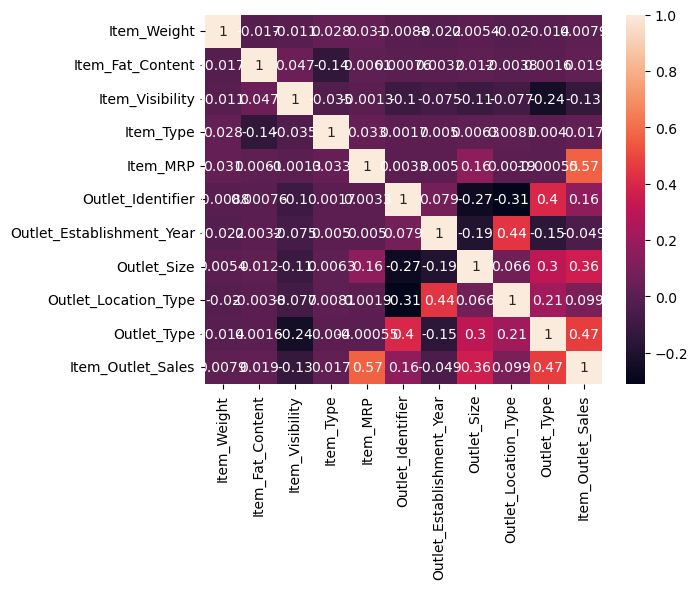

In [59]:
sns.heatmap(df.corr(),annot = True)

In [60]:
df.to_csv("df_converted.csv")

In [61]:
df.loc[222]

Item_Identifier                 FDH28
Item_Weight                     15.85
Item_Fat_Content                    1
Item_Visibility              0.110031
Item_Type                           5
Item_MRP                      37.2506
Outlet_Identifier                   8
Outlet_Establishment_Year        1997
Outlet_Size                         0
Outlet_Location_Type                0
Outlet_Type                         2
Item_Outlet_Sales            265.6542
Name: 222, dtype: object